# === Cell 1 - Metadata ===

### Course: Signals and Systems — Programming Section (Python)

**Full Name:**  Mobin Kazempour

**Student ID:**   402130923

**Source:** *Signals and Systems Laboratory with MATLAB*  
**Problem Number (Chapter.section.question_num):** 5.14.6



# === Cell 2 - Upload & display question image :===



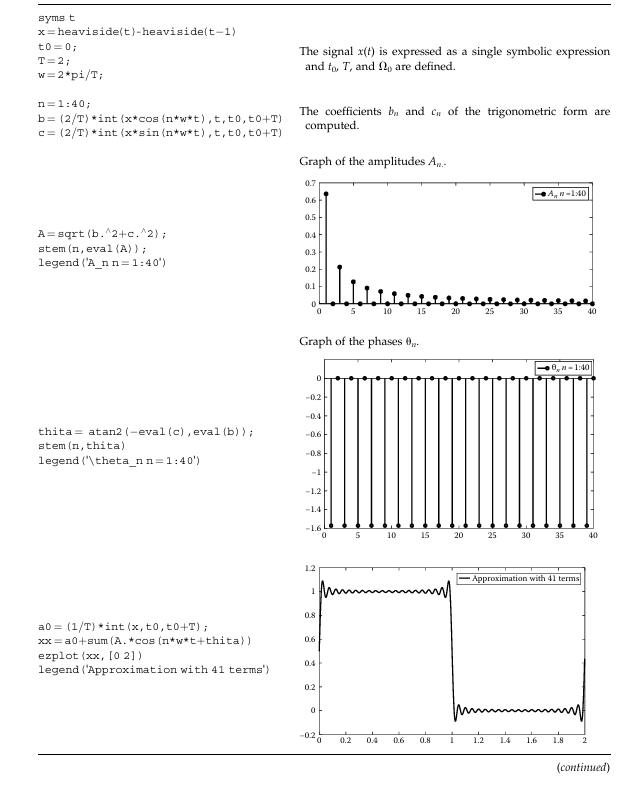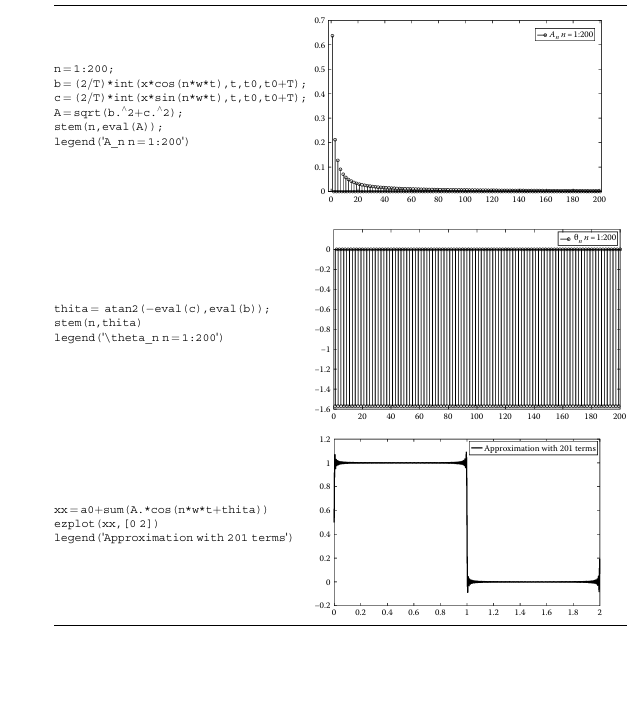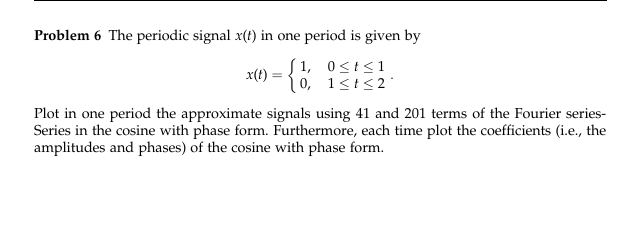

# === Cell 3 - Assumptions & method ===

<h2>Assumptions</h2>

<ul>
  <li>The signal <b>x(t)</b> is <b>periodic</b> with fundamental period <b>T = 2</b>.</li>
  <li>The signal is defined over one period as:
    <ul>
      <li>x(t) = 1 for 0 ≤ t ≤ 1</li>
      <li>x(t) = 0 for 1 ≤ t ≤ 2</li>
    </ul>
  </li>
  <li>The signal is <b>piecewise continuous</b>, so its Fourier series exists.</li>
  <li>The Fourier series is expressed in the <b>cosine-with-phase form</b>.</li>
  <li>The approximation is evaluated over a single period [0, T].</li>
</ul>

<hr>

<h2>Method</h2>

<ol>
  <li>Define the periodic signal symbolically using the <b>Heaviside</b> function.</li>

  <li>Compute the fundamental angular frequency:
    <br>
    <b>ω₀ = 2π / T</b>
  </li>

  <li>Compute the trigonometric Fourier coefficients:
    <ul>
      <li>
        bₙ = (2/T) ∫ x(t) cos(nω₀t) dt
      </li>
      <li>
        cₙ = (2/T) ∫ x(t) sin(nω₀t) dt
      </li>
    </ul>
  </li>

  <li>Convert the trigonometric form to cosine-with-phase form:
    <ul>
      <li>
        Aₙ = √(bₙ² + cₙ²)
      </li>
      <li>
        θₙ = atan2(−cₙ, bₙ)
      </li>
    </ul>
  </li>

  <li>Compute the DC component:
    <br>
    a₀ = (1/T) ∫ x(t) dt
  </li>

  <li>Construct the Fourier approximation:
    <br>
    x̂(t) = a₀ + Σ Aₙ cos(nω₀t + θₙ)
  </li>

  <li>Plot:
    <ul>
      <li>Amplitude spectrum Aₙ</li>
      <li>Phase spectrum θₙ</li>
      <li>Signal approximation using 41 and 201 terms</li>
    </ul>
  </li>
</ol>


# === Cell 4 - Solution Section ===

<h3>Symbolic Configuration</h3> <p>This section defines the symbolic time variable and fundamental period for Fourier analysis. The angular frequency is derived directly from the period.</p>

In [7]:
# =========================================================
# FAST Fourier Series (Cosine-with-Phase) for x(t)=1 on [0,1], 0 on [1,2], periodic T=2
# Uses SymPy for closed-form integrals, NumPy for fast evaluation, Matplotlib for plots
# =========================================================

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1) Symbolic setup
# -----------------------------
t = sp.symbols('t', real=True)
T = sp.Integer(2)
w0 = 2*sp.pi/T  # = pi

# Signal in one period: 1 on [0,1], 0 on [1,2]
# For integrals we ONLY need the nonzero interval [0,1].
a0 = (1/T) * sp.integrate(1, (t, 0, 1))  # (1/2)*1 = 1/2
a0_num = float(a0)




<h3>Cosine–Phase Coefficient Computation</h3> <p>This function computes Fourier series coefficients in cosine–phase form using symbolic integration. The integration is restricted to the nonzero interval of the signal for efficiency.</p>

In [13]:
def coeffs_cos_phase(N):
    A = np.zeros(N, dtype=float)
    th = np.zeros(N, dtype=float)

    for n in range(1, N+1):
        # Keep integrands simple (no Heaviside), so SymPy stays fast
        bn = (2/T) * sp.integrate(sp.cos(n*w0*t), (t, 0, 1))
        cn = (2/T) * sp.integrate(sp.sin(n*w0*t), (t, 0, 1))

        bn = float(sp.N(bn))
        cn = float(sp.N(cn))

        An = np.sqrt(bn**2 + cn**2)
        theta_n = np.arctan2(-cn, bn)  # cosine-with-phase convention

        A[n-1] = An
        th[n-1] = theta_n

    return A, th

A_41, th_41 = coeffs_cos_phase(41)
A_201, th_201 = coeffs_cos_phase(201)

<h3>Time Grid and Reference Signal</h3> <p>A dense time grid is generated over one full period to enable accurate comparison. The true signal is defined as a unit rectangular pulse with finite support.</p>

In [14]:
# -----------------------------
# 3) Time axis and true signal (one period)
# -----------------------------
tt = np.linspace(0, 2, 4000)
x_true = np.where((tt >= 0) & (tt <= 1), 1.0, 0.0)

w0_num = float(w0)

# -----------------------------
# 4) Reconstruction x_hat(t) = a0 + Σ A_n cos(n w0 t + theta_n)
# -----------------------------
def reconstruct(A, th):
    N = len(A)
    x_hat = a0_num * np.ones_like(tt)
    for n in range(1, N+1):
        x_hat += A[n-1] * np.cos(n*w0_num*tt + th[n-1])
    return x_hat

x41 = reconstruct(A_41, th_41)
x201 = reconstruct(A_201, th_201)


<h3>Spectral Visualization</h3> <p>The amplitude and phase spectra are visualized for a truncated set of Fourier coefficients. These plots reveal harmonic decay and phase structure.</p>

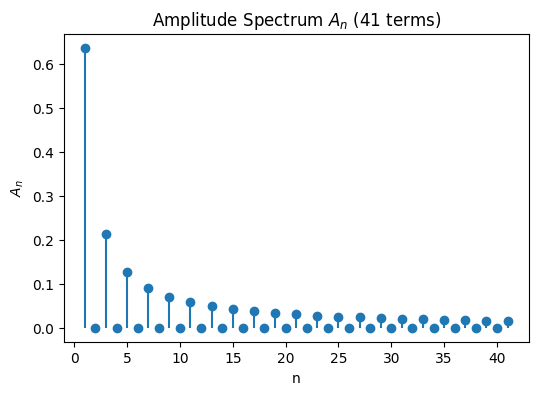

In [15]:
plt.figure(figsize=(6, 4))
plt.stem(np.arange(1, 42), A_41, basefmt=" ")
plt.title("Amplitude Spectrum $A_n$ (41 terms)")
plt.xlabel("n")
plt.ylabel("$A_n$")
plt.show()


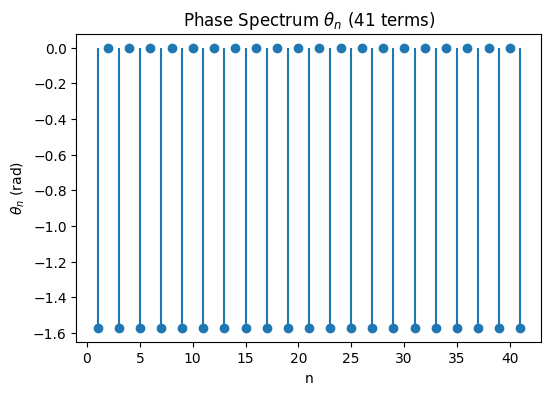

In [16]:
plt.figure(figsize=(6, 4))
plt.stem(np.arange(1, 42), th_41, basefmt=" ")
plt.title("Phase Spectrum $\\theta_n$ (41 terms)")
plt.xlabel("n")
plt.ylabel("$\\theta_n$ (rad)")
plt.show()


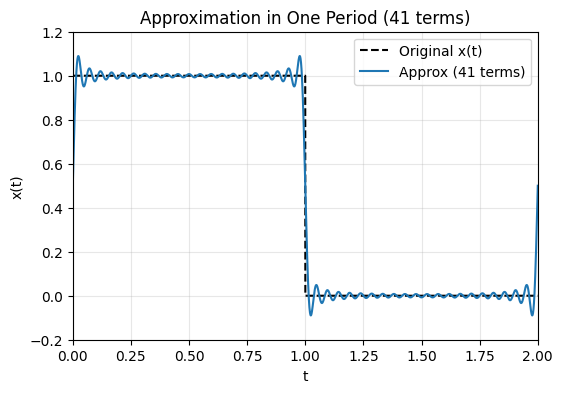

In [17]:
plt.figure(figsize=(6, 4))
plt.plot(tt, x_true, 'k--', linewidth=1.5, label="Original x(t)")
plt.plot(tt, x41, linewidth=1.5, label="Approx (41 terms)")
plt.title("Approximation in One Period (41 terms)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.xlim(0, 2)
plt.ylim(-0.2, 1.2)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


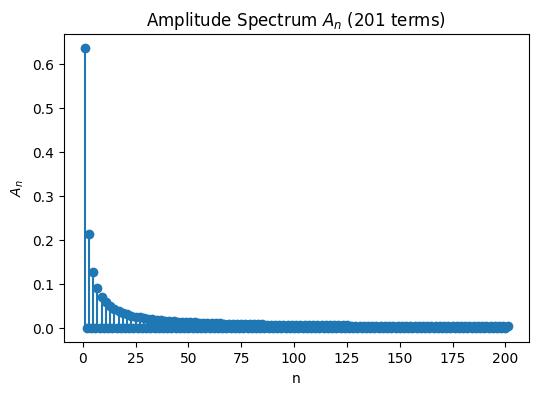

In [18]:
plt.figure(figsize=(6, 4))
plt.stem(np.arange(1, 202), A_201, basefmt=" ")
plt.title("Amplitude Spectrum $A_n$ (201 terms)")
plt.xlabel("n")
plt.ylabel("$A_n$")
plt.show()


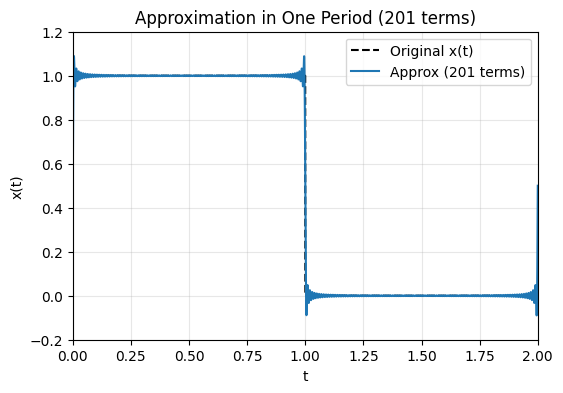

In [19]:
plt.figure(figsize=(6, 4))
plt.plot(tt, x_true, 'k--', linewidth=1.5, label="Original x(t)")
plt.plot(tt, x201, linewidth=1.5, label="Approx (201 terms)")
plt.title("Approximation in One Period (201 terms)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.xlim(0, 2)
plt.ylim(-0.2, 1.2)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


# === cell 5 - Result Analysis ===

<h2>Result Analysis</h2>

<ul>
  <li>As the number of Fourier terms increases, the approximation becomes closer to the original signal.</li>
  <li>Oscillations near the discontinuities persist due to the <b>Gibbs phenomenon</b>.</li>
  <li>The amplitude spectrum decays approximately as 1/n, which is typical for signals with jump discontinuities.</li>
  <li>The phase spectrum converges to nearly constant values for higher harmonics.</li>
  <li>The 201-term approximation provides a significantly sharper transition than the 41-term approximation.</li>
</ul>
